In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore')
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\HousingData (1).csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#CRIM: per capita crime rate by town
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM: average number of rooms per dwelling
#AGE: proportion of owner-occupied units built prior to 1940
#DIS: weighted distances to five Boston employment centres
#RAD: index of accessibility to radial highways
#TAX: full-value property-tax rate per 10,000 Dollars
#PTRATIO: pupil-teacher ratio by town
#B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT: % lower status of the population
#MEDV: Median value of owner-occupied homes in $1000's

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

20 missing values isn't much, but I'll replace it with an average anyway 

In [6]:
print(f"20 missing values it's {round((df['CRIM'].isnull().sum()/df.shape[0])*100, 2)}")

20 missing values it's 3.95


In [7]:
list_mis = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

for i in list_mis:
    df.fillna(df[i].median(), inplace = True)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

After measuring how many percent of the missing values are, I started processing them, looped through each column (where the missing values are), and replaced them with the median, which was successful, and now we have no missing values

In [9]:
df.shape

(506, 14)

Now let's work with the missing values

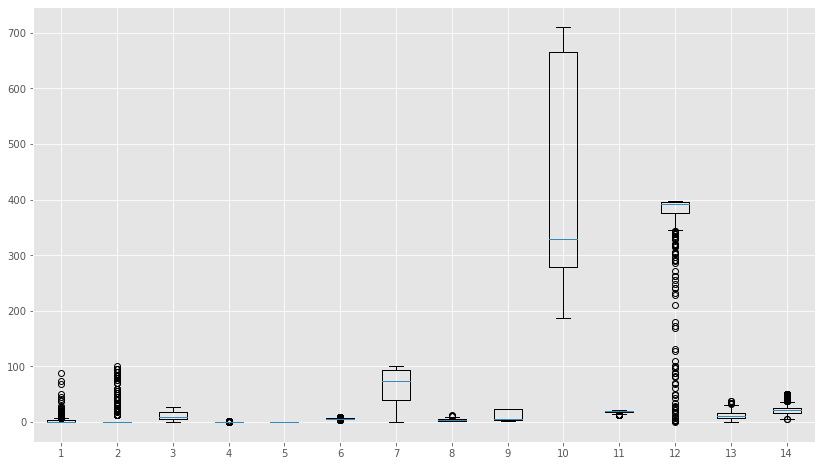

In [10]:
plt.figure(figsize = (14, 8))
plt.boxplot(df)
plt.show()

In [11]:
def outliners(col):
    Q1 = np.percentile(df[col], 25, interpolation  = 'midpoint')
    Q3 = np.percentile(df[col], 75, interpolation  = 'midpoint')
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    print(f'OUTLINERS {col}')
    print(f'Interquartile range: {IQR}')
    print(f'Upper bound box: {upper}')
    print(f'Lower bound box: {lower}')
    
    outl = []
    for x in df[col]:
        if x < upper and x > lower:
            outl.append(x)
        else:
            outl.append(0)
            
    #outl = [x for x in df[col] if x < upper and x > lower]
    
    df[col] = pd.DataFrame(outl)

In [12]:
list_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

for i in list_col:
    outliners(i)

OUTLINERS CRIM
Interquartile range: 2.71567
Upper bound box: 6.872565
Lower bound box: -3.990115
OUTLINERS ZN
Interquartile range: 0.253715
Upper bound box: 0.6342875000000001
Lower bound box: -0.38057250000000004
OUTLINERS RM
Interquartile range: 0.7360000000000007
Upper bound box: 7.726000000000001
Lower bound box: 4.781999999999998
OUTLINERS DIS
Interquartile range: 3.0646000000000004
Upper bound box: 9.76185
Lower bound box: -2.496550000000001
OUTLINERS PTRATIO
Interquartile range: 2.8000000000000007
Upper bound box: 24.4
Lower bound box: 13.199999999999998
OUTLINERS B
Interquartile range: 20.795000000000073
Upper bound box: 427.41250000000014
Lower bound box: 344.23249999999985
OUTLINERS LSTAT
Interquartile range: 9.950000000000001
Upper bound box: 31.475
Lower bound box: -8.325000000000001
OUTLINERS MEDV
Interquartile range: 7.949999999999999
Upper bound box: 36.925
Lower bound box: 5.125000000000002


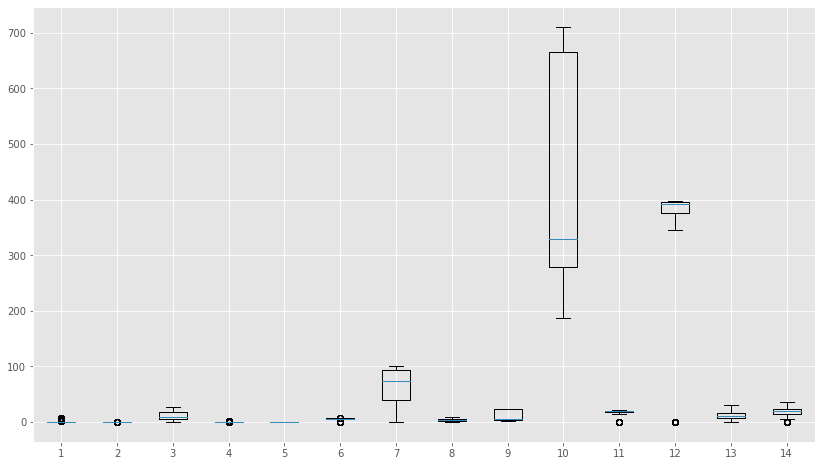

In [13]:
plt.figure(figsize = (14, 8))
plt.boxplot(df)
plt.show()

With emissions worked, compared to what it was, the data now flocks more beautiful, much less emissions 

Then let's proceed to a more detailed study on the graphs

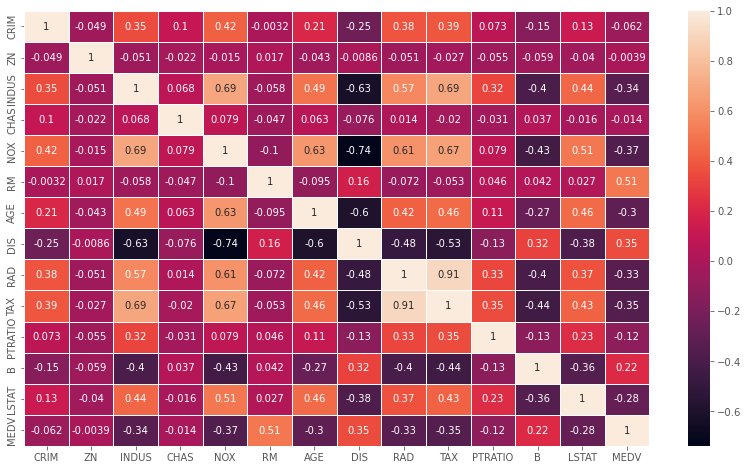

In [14]:
plt.figure(figsize = (14, 8))
sns.heatmap(df.corr(), annot = True, linewidth = .5)
plt.show()

Some data are not related at all, and this exceeds the value by half (i.e. > -0.5), in principle there is a lot of unrelated data in this data set, this will rather interfere in training, so we will deal with this later, but now let's see how the variables are correlated in the graph 

In [15]:
def graph(col_1, col_2, data):
    plt.figure(figsize=(14, 8))
    sns.regplot(x = col_1, y = col_2, data = data, robust = True)

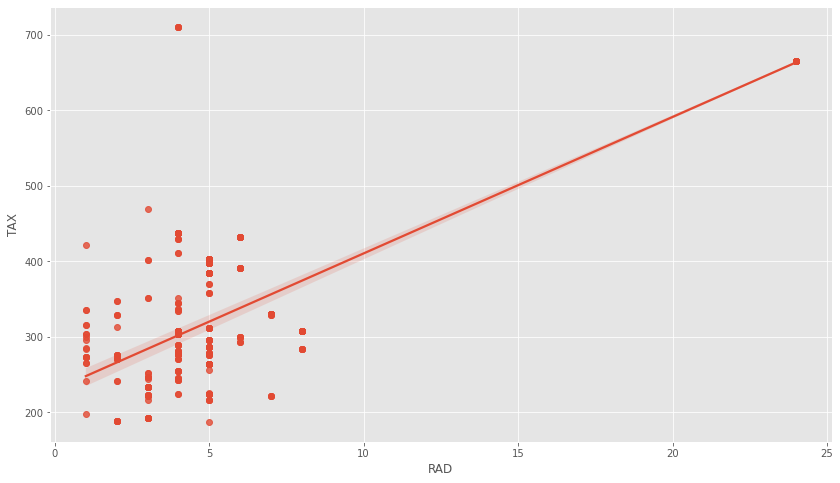

In [16]:
graph('RAD', 'TAX', df)

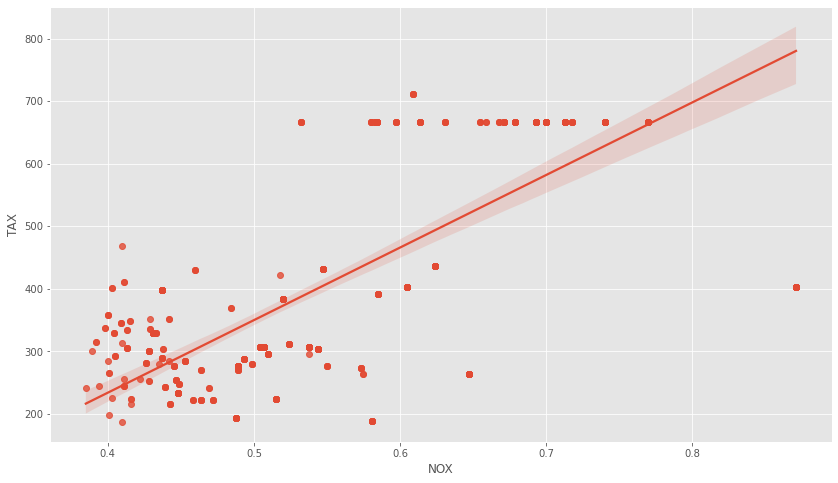

In [17]:
graph('NOX', 'TAX', df)

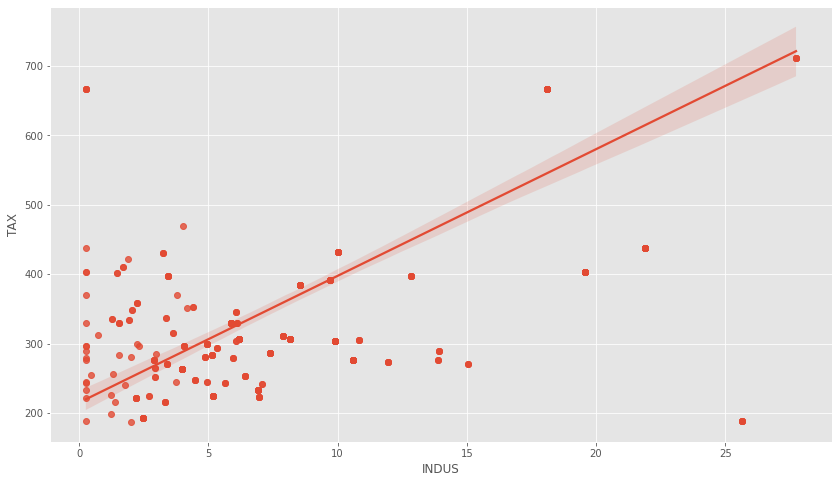

In [18]:
graph('INDUS', 'TAX', df)

Here we can observe taxes

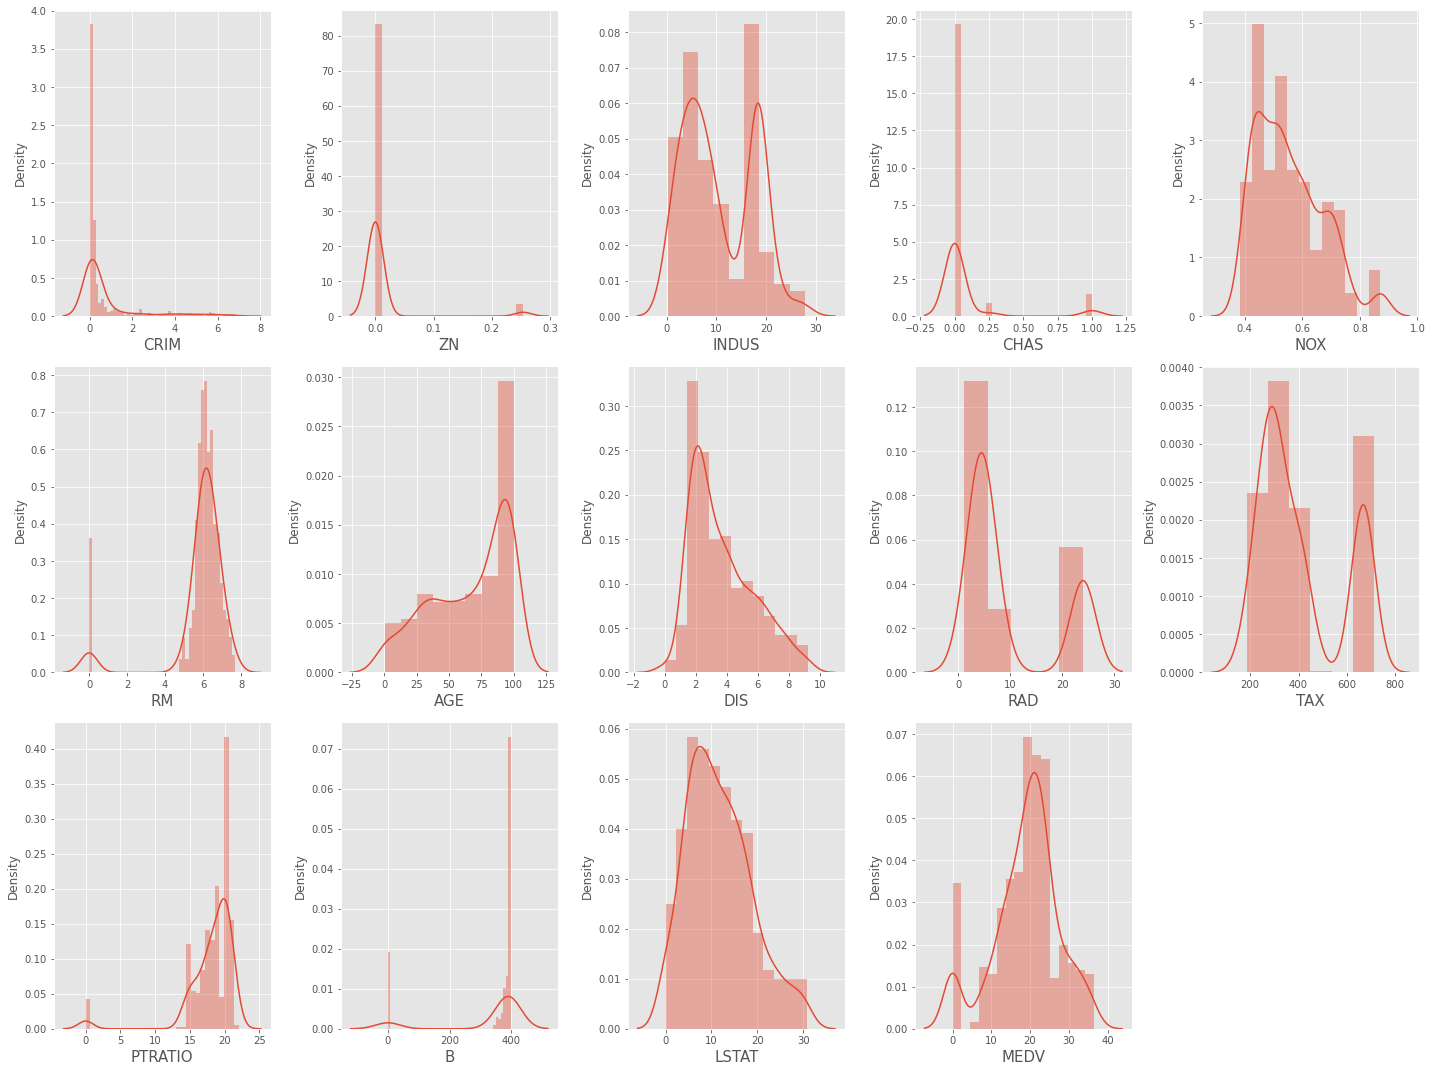

In [19]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
def model(model, x_train, y_train, x_test, y_test):
    mod = model
    mod_fit = mod.fit(x_train, y_train)
    y_pred = mod_fit.predict(x_test)
    print('Model results')
    print('MAE:', mean_absolute_error(y_pred, y_test).round(2))
    print('MSE:', mean_squared_error(y_pred, y_test).round(2))
    print('RMSE:', np.sqrt(mean_absolute_error(y_pred, y_test)).round(2))
    print('R2_score:', r2_score(y_pred, y_test).round(2))
    print('-'*20)
    
    df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
    print(df_model.head(10))
    
    plt.figure(figsize = (14, 8))
    sns.regplot(x = y_test, y = y_pred)

Model results
MAE: 3.67
MSE: 35.6
RMSE: 1.92
R2_score: -0.23
--------------------
     Test    Predict
173  23.6  23.340842
274  32.4  24.291722
491  13.6  14.995760
72   22.8  22.166665
452  16.1  16.994751
76   20.0  20.730196
316  17.8  20.058971
140  14.0  16.380455
471  19.6  18.097390
500  16.8  18.871433


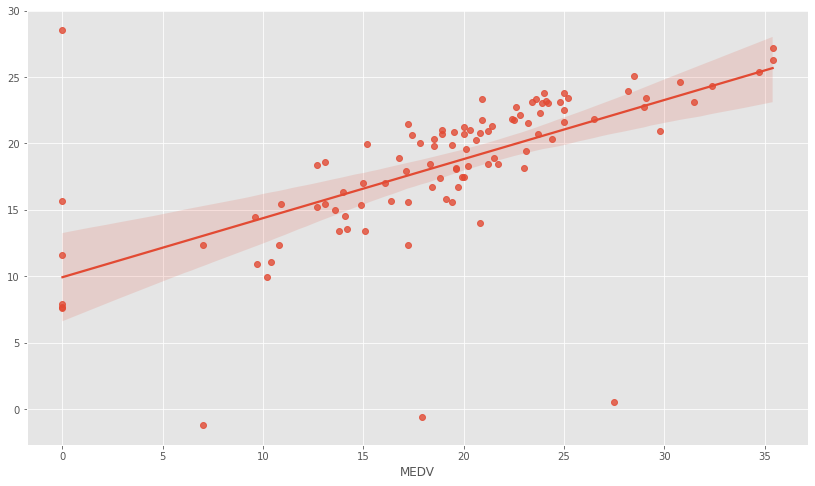

In [26]:
model(LinearRegression(), X_train, y_train, X_test, y_test)

Model results
MAE: 2.97
MSE: 18.31
RMSE: 1.72
R2_score: 0.51
--------------------
     Test    Predict
173  23.6  24.822580
274  32.4  26.788498
491  13.6  15.185845
72   22.8  22.053995
452  16.1  17.524665
76   20.0  22.858470
316  17.8  20.067387
140  14.0  13.068859
471  19.6  20.381407
500  16.8  20.523722


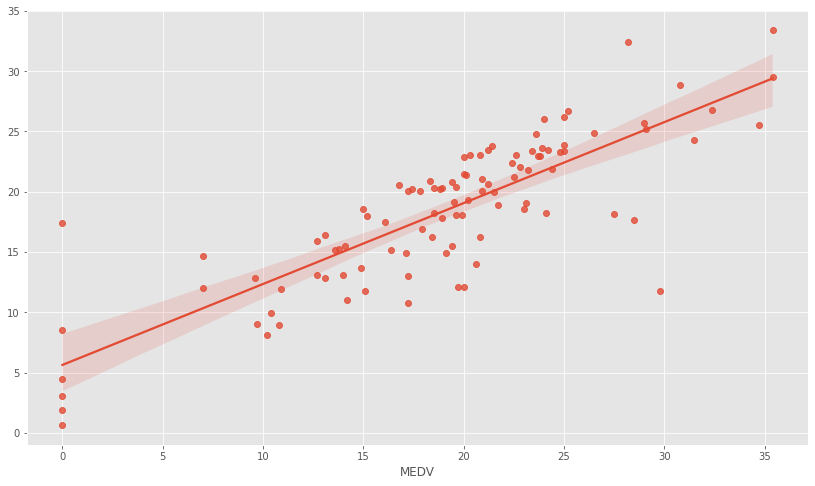

In [27]:
model(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

Model results
MAE: 3.86
MSE: 36.02
RMSE: 1.96
R2_score: -0.52
--------------------
     Test    Predict
173  23.6  22.704024
274  32.4  23.896099
491  13.6  15.376715
72   22.8  21.729223
452  16.1  16.089809
76   20.0  20.557382
316  17.8  19.838308
140  14.0  16.892562
471  19.6  17.163888
500  16.8  19.016939


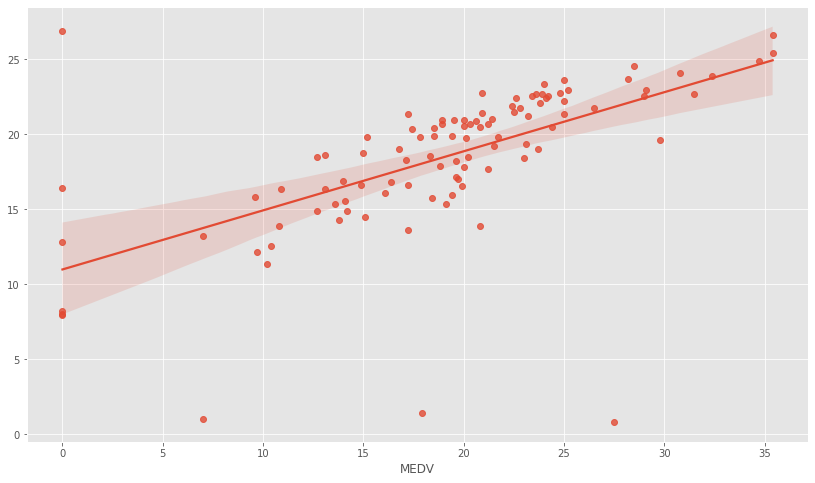

In [28]:
model(LassoCV(alphas = np.arange(0, 1, 0.01), cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1), n_jobs = -1), X_train, y_train, X_test, y_test)